In [1]:
import scipy as sp
import scipy.interpolate
file = open("salt2_template_1.dat")
lines = file.readlines()
file.close()
    
xtemp = []
ytemp = []
ztemp = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])
    ytemp.append(co[1])
    ztemp.append(co[2])

In [2]:
import numpy as np

xtemp = np.array(xtemp, dtype=float)
ytemp = np.array(ytemp, dtype=float)
ztemp = np.array(ztemp, dtype=float)

In [3]:
print(xtemp)
print(ytemp)
print(ztemp)

[-20. -20. -20. ...  50.  50.  50.]
[2000. 2010. 2020. ... 9180. 9190. 9200.]
[0.         0.         0.         ... 0.01562876 0.01553518 0.01540527]


In [4]:
ztemp = ztemp

In [5]:
import scipy.interpolate as interp

gradex,gradey = np.meshgrid(np.linspace(min(xtemp),max(xtemp),71),np.linspace(min(ytemp),max(ytemp),721))

f = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='linear')


In [6]:
temp_listx = list(gradex[0])

idx_x = temp_listx.index(0)

temp_listy = []
for i in range(0,len(gradey)):
    
    
    temp_listy.append(gradey[i][0])
    

idx_y = temp_listy.index(4000)


z_temporary = np.reshape(ztemp, (len(gradex), len(gradex[0]))).T
max_value_temp = z_temporary[idx_x][idx_y]

In [7]:
max_value_temp

-0.001876776508

In [8]:
print(f)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.42449208e-05  1.45519933e-04 ...  1.94374702e-06
  -2.29328268e-06 -7.67180817e-06]
 [ 0.00000000e+00  1.37295382e-04  5.83421262e-04 ...  7.79290722e-06
  -9.19427217e-06 -3.07579580e-05]
 ...
 [ 0.00000000e+00  1.46130930e-02  6.20966927e-02 ...  2.86315981e-02
   2.23833788e-02  1.56287602e-02]
 [ 0.00000000e+00  1.50415401e-02  6.39173303e-02 ...  2.91389960e-02
   2.25999716e-02  1.55351761e-02]
 [ 0.00000000e+00  1.54644167e-02  6.57142968e-02 ...  2.96170484e-02
   2.27838144e-02  1.54052733e-02]]


In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0salt'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0salt'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n"

In [10]:
file = open("M1.dat")
lines = file.readlines()
file.close()
    
xsub = []
ysub = []
zsub = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xsub.append(co[0])
    ysub.append(co[1])
    zsub.append(co[2])

In [11]:
xsub = np.array(xsub, dtype=float)
ysub = np.array(ysub, dtype=float)
zsub = np.array(zsub, dtype=float)

In [12]:
zsub = zsub

In [13]:
gradex,gradey = np.meshgrid(np.linspace(min(xsub),max(xsub),38),np.linspace(min(ysub),max(ysub),30))

fsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='nearest')

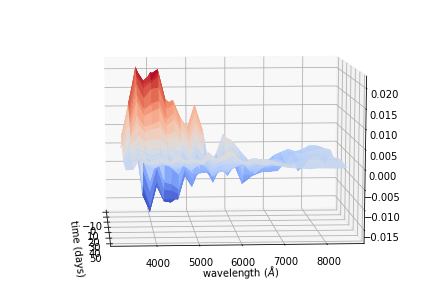

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0my'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

In [15]:
xx_temp = np.linspace(-10,50,61)
yy_temp = np.linspace(3800,6800,31)

In [16]:
gradex,gradey = np.meshgrid(xx_temp,yy_temp)

In [17]:
xx_temp

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

In [18]:
gradey

array([[3800., 3800., 3800., ..., 3800., 3800., 3800.],
       [3900., 3900., 3900., ..., 3900., 3900., 3900.],
       [4000., 4000., 4000., ..., 4000., 4000., 4000.],
       ...,
       [6600., 6600., 6600., ..., 6600., 6600., 6600.],
       [6700., 6700., 6700., ..., 6700., 6700., 6700.],
       [6800., 6800., 6800., ..., 6800., 6800., 6800.]])

In [19]:
len(zsub)

31781

In [24]:
temp_listx = list(gradex[0])

idx_x = temp_listx.index(0)

temp_listy = []
for i in range(0,len(gradey)):
    
    
    temp_listy.append(gradey[i][0])
    

idx_y = temp_listy.index(4000)


z_temporary = np.reshape(zsub, (521, len(gradex[0]))).T
max_value_sub = z_temporary[idx_x][idx_y]

In [25]:
supref = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='nearest')/max_value_temp

In [26]:
supsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='nearest')/max_value_sub

In [27]:
import math
xx = []
yy = []
zz = []
for i in range(0,len(xx_temp)):
    for j in range(0,len(yy_temp)):
        
        if math.isnan(supref[j][i]) == False and math.isnan(supsub[j][i]) == False and supref[j][i] != 0:
            
            xx.append(xx_temp[i])
            yy.append(yy_temp[j])
            zz.append((supref[j][i] - supsub[j][i])/supref[j][i])

In [28]:
zz

[1.105877058100462,
 1.2210853342950996,
 1.1466958315638995,
 1.2363768613885475,
 1.2315637109648587,
 1.116525145481229,
 1.279231384919447,
 1.2776309224383744,
 1.1502361816038793,
 1.1394009722760599,
 1.1503212325793644,
 1.1957179399244717,
 1.298178234024463,
 1.1959890745251964,
 1.137710757235509,
 1.025716638327504,
 1.0319927949320793,
 1.3192107123426733,
 1.397009679801086,
 1.340579388914795,
 1.3284632034982191,
 1.2549767173365958,
 1.105732710315752,
 1.0445267301272494,
 1.5680384044580056,
 2.085981865986898,
 1.9803530825271587,
 2.141431402470194,
 1.9140784785070102,
 1.4661922054731216,
 1.223309975777215,
 1.114902737624421,
 1.3347919770029517,
 1.1682696396309673,
 1.292917959180302,
 1.3198061603013505,
 1.146384219147361,
 1.2928390551387348,
 1.3049298073602538,
 1.1654273253661263,
 1.169422877399928,
 1.1652850837558457,
 1.2514212329021146,
 1.3992436966428352,
 1.2485713742138858,
 1.1501971854957616,
 1.0569707556669736,
 1.052583368450736,
 1.373434

In [29]:
gradex,gradey = np.meshgrid(np.linspace(-10,45,56),np.linspace(4000,6000,39))

fcomp = interp.griddata((xx,yy),zz,(gradex,gradey),method='linear')

In [30]:
fcomp

array([[1.14669583, 1.16826964, 1.19993385, ..., 0.36926827, 0.22427066,
        0.03497612],
       [1.19389637, 1.23387402, 1.29897809, ..., 0.49838202, 0.40071051,
        0.28275188],
       [1.23612354, 1.29433313, 1.39414447, ..., 0.60743018, 0.55289659,
        0.50063134],
       ...,
       [1.25884443, 1.32703747, 1.46107914, ..., 0.39618502, 0.27365959,
        0.18034621],
       [1.18428219, 1.22808007, 1.30909094, ..., 0.52970444, 0.43820973,
        0.36811345],
       [1.10573271, 1.12217159, 1.14448124, ..., 0.68957739, 0.63765228,
        0.59686072]])

<IPython.core.display.Javascript object>


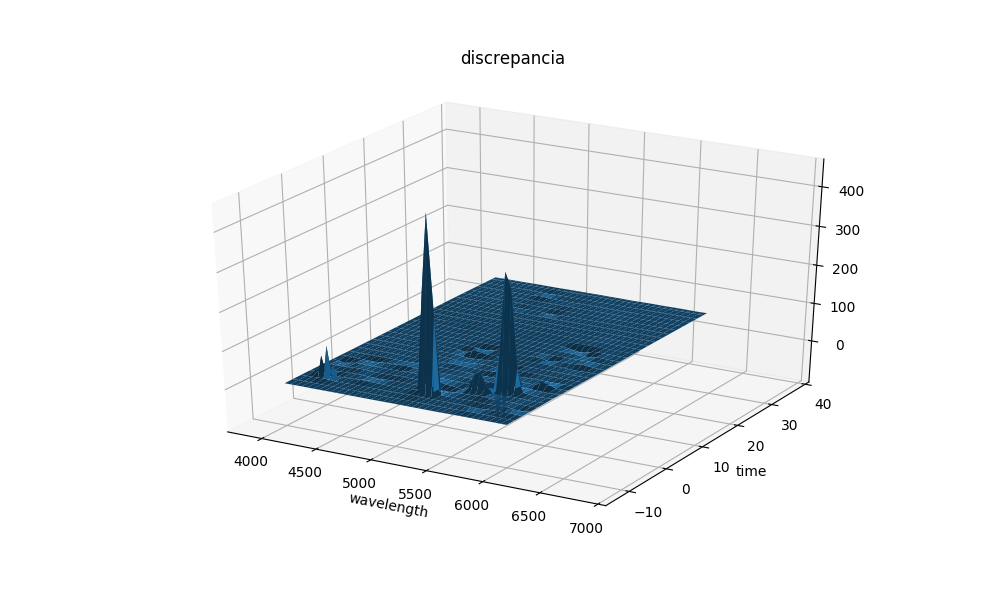

In [33]:
%matplotlib notebook

fig3=plt.figure(figsize=(10,6))
ax3=plt.axes(projection='3d')

surf=ax3.plot_surface(gradey, gradex, fcomp, alpha=1)
ax3.title.set_text('discrepancia')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('time')
ax3.set_xlim(3750, 7000)
ax3.set_ylim(-15, 40)
#ax3.set_zlim(-1, 1)
plt.show()

<IPython.core.display.Javascript object>


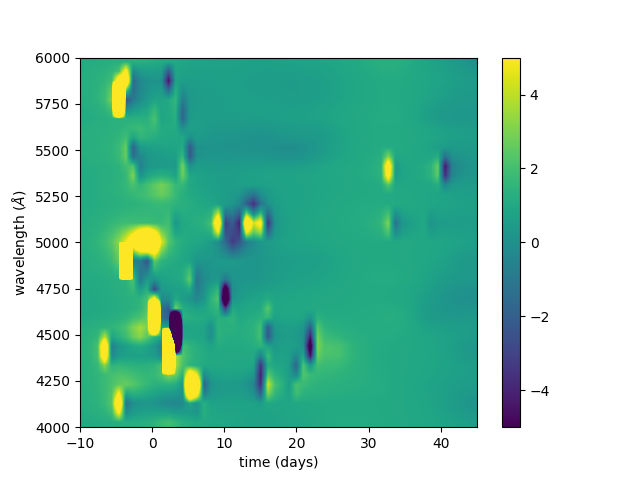

In [34]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(fcomp, extent=(np.amin(gradex), np.amax(gradex), np.amin(gradey), np.amax(gradey)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(-5,5)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()
